# Sentiment Classification

(a) Load the IMDB movie reviews sentiment classification data provided in Keras

(b) Split the data into a training, validation and testing subsets.

(c) Build a network with a trainable embedding layer and two fully connected layers (including the output layer)

(d) Train and evaluate accuracy for sentiment classification

(e) Download the GloVe word embedding file and load it into an embedding matrix. Initialize the embedding layer using the embedding matrix you loaded and freeze the weights.

(f) Train and evaluate accuracy for sentiment classification with the embedding layer weights fixed.

(g) Compare the results of trainable and loaded embedding layer and draw conclusions

(h) Replace the fully connected layer with an LSTM layer and repeat training (Choose whether you want pretrained or trainable embedding layer).

(i) Train, evaluate and draw conclusion

### (a) Load the IMDB movie reviews sentiment classification data provided in Keras and (b) Split the data into a training, validation and testing subsets.

In [ ]:
from keras.datasets import imdb
from keras import preprocessing
import tensorflow as tf
import matplotlib.pyplot as plt
import os
import numpy as np

In [ ]:
max_features = 10000
embedding_dim = 100
maxlen = 100

(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=max_features)

X_train = tf.keras.preprocessing.sequence.pad_sequences(X_train,maxlen=maxlen)
X_test = tf.keras.preprocessing.sequence.pad_sequences(X_test,maxlen=maxlen)

17464789/17464789 [==============================] - 0s 0us/step


In [ ]:
print(f'Size X_train: {len(X_train)}')
print(f'Size y_train: {len(y_train)}')

print(f'Size X_test: {len(X_test)}')
print(f'Size y_test: {len(y_test)}')

Size X_train: 25000
Size y_train: 25000
Size X_test: 25000
Size y_test: 25000


So we have 50,000 total samples. Currently split in 25 25, this wont be a good split. I'm going to take a chunk from the test set and add it to the training set and then split the remaining of the test set into a test set and validation set

In [ ]:
X_train = np.concatenate((X_train, X_test[0:10000]))
y_train = np.concatenate((y_train, y_test[0:10000]))

#So the first 10,000 samples from X_test and y_test are now UNUSABLE, so we have to shrink X-test and ytest respectively
X_test = X_test[10000:]
y_test = y_test[10000:]

#Currently the train set is of size 35,000. the test set is of size 15000, let's split the test set in half now so we have 7500 for val set and the remaining for test set
X_val = X_test[0:7500]
y_val = y_test[0:7500]

# Now again, we need to reduce the size of the test set since we just split from it. the first 7500 samples from xtest and ytest are UNUSABLE for testing
X_test = X_test[7500:]
y_test = y_test[7500:]

#print shapes
print(f'Train set shape X: {X_train.shape}')
print(f'Train set shape y: {y_train.shape}')

print(f'Val set shape X: {X_val.shape}')
print(f'Val set shape y: {y_val.shape}')

print(f'Test set shape X: {X_test.shape}')
print(f'Test set shape y: {y_test.shape}')



Train set shape X: (35000, 100)
Train set shape y: (35000,)
Val set shape X: (7500, 100)
Val set shape y: (7500,)
Test set shape X: (7500, 100)
Test set shape y: (7500,)


We've now acquired a 70, 15, 15 split for the data. Lets proceed

### (c) Build a network with a trainable embedding layer and two fully connected layers (including the output layer)

In [ ]:
from keras import Sequential
from keras.layers import Flatten, Dense, Embedding

In [ ]:
def model_init():

  max_features = 10000
  embedding_dim = 100
  maxlen = 100
  model = Sequential()

  model.add(Embedding(max_features, embedding_dim, input_length=maxlen))
  model.add(Flatten())
  model.add(Dense(8,activation='relu'))
  model.add(Dense(1,activation='sigmoid'))

  return model

In [ ]:
model = model_init()
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 100, 100)          1000000   
                                                                 
 flatten_3 (Flatten)         (None, 10000)             0         
                                                                 
 dense_6 (Dense)             (None, 8)                 80008     
                                                                 
 dense_7 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1,080,017
Trainable params: 1,080,017
Non-trainable params: 0
_________________________________________________________________


### (d) Train and evaluate accuracy for sentiment classification

In [ ]:
# plotting function:
def generate_plots(history):
    #accuracies
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()
    #loss curves
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()

Epoch 1/10
547/547 [==============================] - 3s 4ms/step - loss: 0.4136 - acc: 0.8011 - val_loss: 0.3232 - val_acc: 0.8596
Epoch 2/10
547/547 [==============================] - 2s 3ms/step - loss: 0.1443 - acc: 0.9524 - val_loss: 0.3823 - val_acc: 0.8452
Epoch 3/10
547/547 [==============================] - 2s 3ms/step - loss: 0.0198 - acc: 0.9972 - val_loss: 0.4730 - val_acc: 0.8424
Epoch 4/10
547/547 [==============================] - 2s 3ms/step - loss: 0.0030 - acc: 0.9999 - val_loss: 0.5039 - val_acc: 0.8465
Epoch 5/10
547/547 [==============================] - 2s 3ms/step - loss: 9.2837e-04 - acc: 1.0000 - val_loss: 0.5382 - val_acc: 0.8469
Epoch 6/10
547/547 [==============================] - 2s 3ms/step - loss: 4.9304e-04 - acc: 1.0000 - val_loss: 0.5665 - val_acc: 0.8476
Epoch 7/10
547/547 [==============================] - 2s 3ms/step - loss: 3.0241e-04 - acc: 1.0000 - val_loss: 0.5883 - val_acc: 0.8491
Epoch 8/10
547/547 [==============================] - 2s 3ms/ste

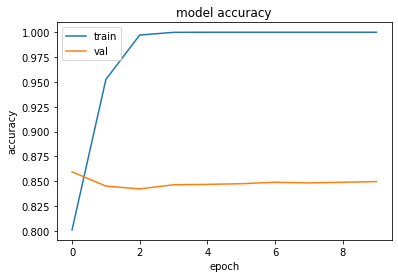

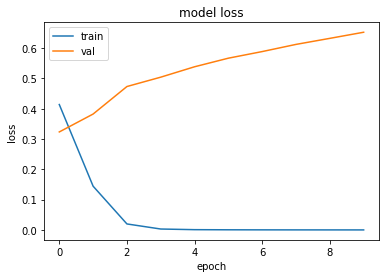

In [ ]:
model = model_init()

#compile model
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['acc'])

#fit and plot results
history = model.fit(x=X_train, y=y_train, batch_size=64, epochs=10, validation_data=(X_val, y_val))

generate_plots(history)

Epoch 1/10
2188/2188 [==============================] - 8s 3ms/step - loss: 0.3907 - acc: 0.8164 - val_loss: 0.3260 - val_acc: 0.8568
Epoch 2/10
2188/2188 [==============================] - 7s 3ms/step - loss: 0.1172 - acc: 0.9586 - val_loss: 0.4547 - val_acc: 0.8328
Epoch 3/10
2188/2188 [==============================] - 7s 3ms/step - loss: 0.0152 - acc: 0.9955 - val_loss: 0.7224 - val_acc: 0.8305
Epoch 4/10
2188/2188 [==============================] - 7s 3ms/step - loss: 0.0047 - acc: 0.9988 - val_loss: 0.9816 - val_acc: 0.8175
Epoch 5/10
2188/2188 [==============================] - 7s 3ms/step - loss: 0.0121 - acc: 0.9957 - val_loss: 0.9771 - val_acc: 0.8209
Epoch 6/10
2188/2188 [==============================] - 7s 3ms/step - loss: 0.0122 - acc: 0.9960 - val_loss: 0.9835 - val_acc: 0.8315
Epoch 7/10
2188/2188 [==============================] - 7s 3ms/step - loss: 0.0028 - acc: 0.9990 - val_loss: 1.1556 - val_acc: 0.8276
Epoch 8/10
2188/2188 [==============================] - 7s 3ms

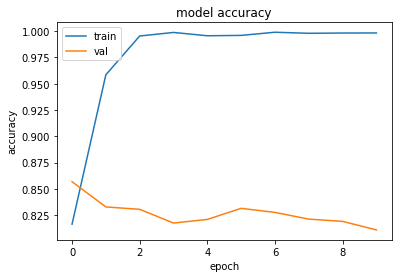

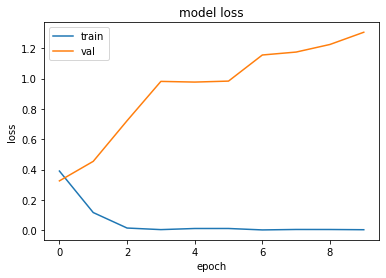

In [ ]:
model = model_init()

#compile model
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['acc'])

#fit and plot results
history = model.fit(x=X_train, y=y_train, batch_size=16, epochs=10, validation_data=(X_val, y_val)) #changed batch size

generate_plots(history)

Model overfits very quickly, not a good model. – Let's evaluate performance by re-training on all training and val data and evaluating on test set for ONLY 2 EPOCHS.

In [ ]:
model = model_init()

#compile model
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['acc'])

#fit and plot results
history = model.fit(x=np.concatenate((X_train, X_val)), y=np.concatenate((y_train, y_val)), batch_size=64, epochs=2) #keeping batch size 64
                    # validation_data=(X_val, y_val))

# generate_plots(history)

Epoch 1/2
665/665 [==============================] - 3s 3ms/step - loss: 0.4007 - acc: 0.8098
Epoch 2/2
665/665 [==============================] - 2s 3ms/step - loss: 0.1506 - acc: 0.9498


In [ ]:
res = model.evaluate(X_test, y_test)
print(f'Loss: {np.round(res[0], 3)}')
print(f'Acc: {np.round(res[1], 3)}')

235/235 [==============================] - 1s 2ms/step - loss: 0.3586 - acc: 0.8507
Loss: 0.359
Acc: 0.851


In [ ]:
model.save('simple_model.h5')

### (e) Download the GloVe word embedding file and load it into an embedding matrix. Initialize the embedding layer using the embedding matrix you loaded and freeze the weights.

In [ ]:
#download it
!wget http://nlp.stanford.edu/data/glove.6B.zip

#unzip it
!unzip -q glove*.zip

--2022-11-19 22:13:02--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2022-11-19 22:13:02--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2022-11-19 22:13:02--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip.1’

gl

In [ ]:
glove_dir = '/content/'
embeddings_index = {}
f = open(os.path.join(glove_dir,'glove.6B.100d.txt'),encoding="utf8")
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:],dtype='float32')
    embeddings_index[word] = coefs
f.close()
print("Found %s words vectors." %len(embeddings_index))
# Build an embedding matrix to load the embedding layer
embedding_matrix = np.zeros((max_features,embedding_dim))
for word,i in imdb.get_word_index().items():
    if i < max_features:
        embeddings_vector = embeddings_index.get(word)
        if embeddings_vector is not None:
            embedding_matrix[i] = embeddings_vector

Found 400000 words vectors.


In [ ]:
def model_glove():
    model = Sequential()
    model.add(tf.keras.layers.Embedding(10000,embedding_dim,input_length=maxlen))
    model.add(Flatten())
    model.add(tf.keras.layers.Dense(64,activation='relu'))
    model.add(tf.keras.layers.Dense(1,activation='sigmoid'))
    model.summary()

    model.layers[0].set_weights([embedding_matrix])
    model.layers[0].trainable = False

    return model

### (f) Train and evaluate accuracy for sentiment classification with the embedding layer weights fixed.

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_9 (Embedding)     (None, 100, 100)          1000000   
                                                                 
 flatten_9 (Flatten)         (None, 10000)             0         
                                                                 
 dense_18 (Dense)            (None, 64)                640064    
                                                                 
 dense_19 (Dense)            (None, 1)                 65        
                                                                 
Total params: 1,640,129
Trainable params: 1,640,129
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
547/547 [==============================] - 2s 3ms/step - loss: 0.6940 - acc: 0.5459 - val_loss: 0.6806 - val_acc: 0.5556
Epoch 2/10
547/547 [========================

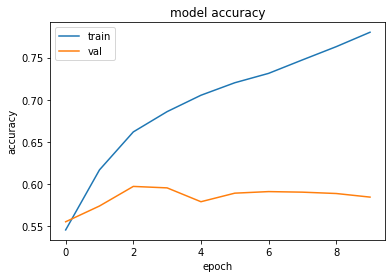

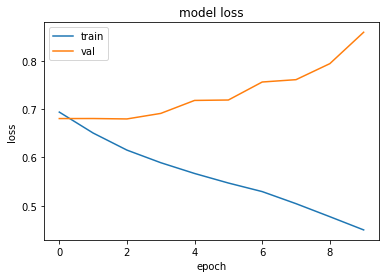

In [ ]:
glovemodel = model_glove()

glovemodel.compile(optimizer='adam',loss='binary_crossentropy',metrics=['acc'])

history = glovemodel.fit(x=X_train, y=y_train, batch_size=64, epochs=10, validation_data=(X_val, y_val)) #changed batch size

generate_plots(history)

In [ ]:
# Let's combine the data, and evaluate performance (and only train for 3 epochs)
glovemodel = model_glove()

glovemodel.compile(optimizer='adam',loss='binary_crossentropy',metrics=['acc'])

history = glovemodel.fit(x=np.concatenate((X_train, X_val)), y=np.concatenate((y_train, y_val)), batch_size=64, epochs=3)
                        #  validation_data=(X_val, y_val))

# generate_plots(history)
res_glove_trainablefalse = glovemodel.evaluate(X_test, y_test)
print(f'Loss: {np.round(res_glove_trainablefalse[0], 3)}')
print(f'Acc: {np.round(res_glove_trainablefalse[1], 3)}')


Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_11 (Embedding)    (None, 100, 100)          1000000   
                                                                 
 flatten_11 (Flatten)        (None, 10000)             0         
                                                                 
 dense_22 (Dense)            (None, 64)                640064    
                                                                 
 dense_23 (Dense)            (None, 1)                 65        
                                                                 
Total params: 1,640,129
Trainable params: 1,640,129
Non-trainable params: 0
_________________________________________________________________
Epoch 1/3
665/665 [==============================] - 2s 3ms/step - loss: 0.6922 - acc: 0.5440
Epoch 2/3
665/665 [==============================] - 2s 3ms/step - loss: 0.6509 -

Not good, model got worst from last time

In [ ]:
glovemodel.save('trainablefalse_glove.h5')

### (g) Compare the results of trainable and loaded embedding layer and draw conclusions.

In [ ]:
def model_glove_trainableTrue():
    model = Sequential()
    model.add(tf.keras.layers.Embedding(10000,embedding_dim,input_length=maxlen))
    model.add(Flatten())
    model.add(tf.keras.layers.Dense(64,activation='relu'))
    model.add(tf.keras.layers.Dense(1,activation='sigmoid'))
    # model.summary()

    model.layers[0].set_weights([embedding_matrix])
    model.layers[0].trainable = True

    return model

Epoch 1/10
547/547 [==============================] - 3s 4ms/step - loss: 0.7016 - acc: 0.5024 - val_loss: 0.6932 - val_acc: 0.4989
Epoch 2/10
547/547 [==============================] - 2s 4ms/step - loss: 0.6933 - acc: 0.4971 - val_loss: 0.6931 - val_acc: 0.5013
Epoch 3/10
547/547 [==============================] - 2s 3ms/step - loss: 0.6932 - acc: 0.4990 - val_loss: 0.6931 - val_acc: 0.4987
Epoch 4/10
547/547 [==============================] - 2s 3ms/step - loss: 0.6926 - acc: 0.5020 - val_loss: 0.6925 - val_acc: 0.5069
Epoch 5/10
547/547 [==============================] - 2s 3ms/step - loss: 0.6507 - acc: 0.5776 - val_loss: 0.4722 - val_acc: 0.7737
Epoch 6/10
547/547 [==============================] - 2s 3ms/step - loss: 0.3466 - acc: 0.8477 - val_loss: 0.3726 - val_acc: 0.8329
Epoch 7/10
547/547 [==============================] - 2s 3ms/step - loss: 0.1997 - acc: 0.9245 - val_loss: 0.3885 - val_acc: 0.8383
Epoch 8/10
547/547 [==============================] - 2s 3ms/step - loss: 0.

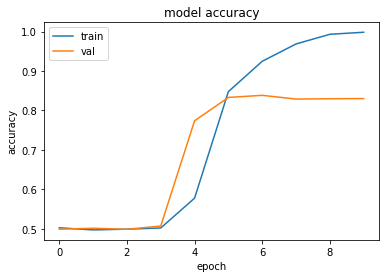

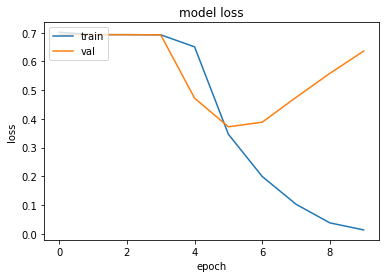

In [ ]:
glovemodel_2 = model_glove_trainableTrue()

glovemodel_2.compile(optimizer='adam',loss='binary_crossentropy',metrics=['acc'])

history = glovemodel_2.fit(x=X_train, y=y_train, batch_size=64, epochs=10, validation_data=(X_val, y_val)) #changed batch size

generate_plots(history)

Interesting. Let's set the cutoff to like 7 epochs and re-train and evaluate the performance

In [ ]:
glovemodel_2 = model_glove_trainableTrue()

glovemodel_2.compile(optimizer='adam',loss='binary_crossentropy',metrics=['acc'])

glovemodel_2.fit(x=np.concatenate((X_train, X_val)), y=np.concatenate((y_train, y_val)), batch_size=64, epochs=7)

# generate_plots(history)

# generate_plots(history)
res_glove_trainableTrue = glovemodel_2.evaluate(X_test, y_test)
print(f'Loss: {np.round(res_glove_trainableTrue[0], 3)}')
print(f'Acc: {np.round(res_glove_trainableTrue[1], 3)}')


Epoch 1/7
665/665 [==============================] - 3s 3ms/step - loss: 0.6956 - acc: 0.5131
Epoch 2/7
665/665 [==============================] - 2s 3ms/step - loss: 0.4734 - acc: 0.7616
Epoch 3/7
665/665 [==============================] - 2s 3ms/step - loss: 0.2603 - acc: 0.8929
Epoch 4/7
665/665 [==============================] - 2s 3ms/step - loss: 0.1646 - acc: 0.9421
Epoch 5/7
665/665 [==============================] - 2s 3ms/step - loss: 0.0837 - acc: 0.9772
Epoch 6/7
665/665 [==============================] - 2s 3ms/step - loss: 0.0311 - acc: 0.9960
Epoch 7/7
235/235 [==============================] - 1s 2ms/step - loss: 0.5501 - acc: 0.8437
Loss: 0.55
Acc: 0.844


### (h) Replace the fully connected layer with an LSTM layer and repeat training (choose whether you want pretrained or trainable embedding layer)

In [ ]:
def model_glove_trainableTrue_LSTM():
    model = Sequential()
    model.add(tf.keras.layers.Embedding(10000,embedding_dim,input_length=maxlen))
    # model.add(Flatten())
    # model.add(tf.keras.layers.Dense(64,activation='relu'))
    model.add(tf.keras.layers.LSTM(units=64,return_sequences = True))
    model.add(Flatten())
    model.add(tf.keras.layers.Dense(1,activation='sigmoid'))
    model.layers[0].set_weights([embedding_matrix])
    model.layers[0].trainable = True

    return model

In [ ]:
modelglove3 = model_glove_trainableTrue_LSTM()
modelglove3.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_19 (Embedding)    (None, 100, 100)          1000000   
                                                                 
 lstm_3 (LSTM)               (None, 100, 64)           42240     
                                                                 
 flatten_18 (Flatten)        (None, 6400)              0         
                                                                 
 dense_33 (Dense)            (None, 1)                 6401      
                                                                 
Total params: 1,048,641
Trainable params: 1,048,641
Non-trainable params: 0
_________________________________________________________________


### (i) Train, evaluate, and draw conclusion.


Epoch 1/10
547/547 [==============================] - 10s 10ms/step - loss: 0.4965 - acc: 0.7310 - val_loss: 0.3451 - val_acc: 0.8464
Epoch 2/10
547/547 [==============================] - 5s 9ms/step - loss: 0.2802 - acc: 0.8811 - val_loss: 0.3313 - val_acc: 0.8565
Epoch 3/10
547/547 [==============================] - 5s 9ms/step - loss: 0.2081 - acc: 0.9169 - val_loss: 0.3432 - val_acc: 0.8559
Epoch 4/10
547/547 [==============================] - 5s 9ms/step - loss: 0.1409 - acc: 0.9481 - val_loss: 0.4155 - val_acc: 0.8493
Epoch 5/10
547/547 [==============================] - 5s 9ms/step - loss: 0.0763 - acc: 0.9757 - val_loss: 0.5195 - val_acc: 0.8407
Epoch 6/10
547/547 [==============================] - 5s 9ms/step - loss: 0.0323 - acc: 0.9913 - val_loss: 0.7308 - val_acc: 0.8368
Epoch 7/10
547/547 [==============================] - 5s 9ms/step - loss: 0.0122 - acc: 0.9976 - val_loss: 0.8941 - val_acc: 0.8351
Epoch 8/10
547/547 [==============================] - 5s 9ms/step - loss: 

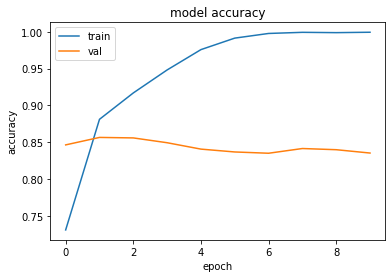

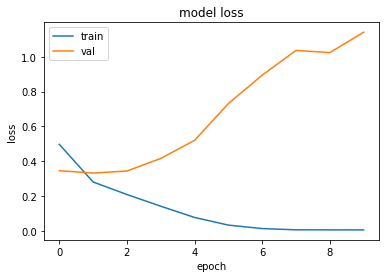

In [ ]:
modelglove3 = model_glove_trainableTrue_LSTM()

modelglove3.compile(optimizer='adam',loss='binary_crossentropy',metrics=['acc'])

history = modelglove3.fit(x=X_train, y=y_train, batch_size=64, epochs=10, validation_data=(X_val, y_val)) #changed batch size

generate_plots(history)

Tuning a bit

Epoch 1/10
274/274 [==============================] - 5s 12ms/step - loss: 0.5316 - acc: 0.7108 - val_loss: 0.3796 - val_acc: 0.8343
Epoch 2/10
274/274 [==============================] - 3s 10ms/step - loss: 0.3138 - acc: 0.8655 - val_loss: 0.3355 - val_acc: 0.8555
Epoch 3/10
274/274 [==============================] - 3s 10ms/step - loss: 0.2439 - acc: 0.8993 - val_loss: 0.3432 - val_acc: 0.8568
Epoch 4/10
274/274 [==============================] - 3s 10ms/step - loss: 0.1933 - acc: 0.9234 - val_loss: 0.3894 - val_acc: 0.8515
Epoch 5/10
274/274 [==============================] - 3s 11ms/step - loss: 0.1443 - acc: 0.9455 - val_loss: 0.4139 - val_acc: 0.8471
Epoch 6/10
274/274 [==============================] - 3s 11ms/step - loss: 0.0974 - acc: 0.9665 - val_loss: 0.5280 - val_acc: 0.8393
Epoch 7/10
274/274 [==============================] - 3s 11ms/step - loss: 0.0553 - acc: 0.9829 - val_loss: 0.6664 - val_acc: 0.8403
Epoch 8/10
274/274 [==============================] - 3s 11ms/step - 

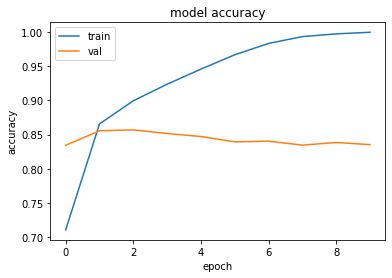

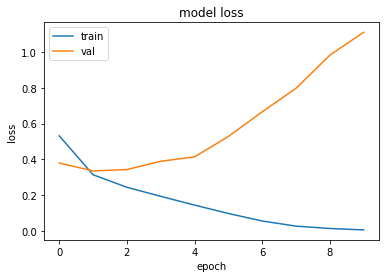

In [ ]:
modelglove3 = model_glove_trainableTrue_LSTM()

modelglove3.compile(optimizer='adam',loss='binary_crossentropy',metrics=['acc'])

history = modelglove3.fit(x=X_train, y=y_train, batch_size=128, epochs=10, validation_data=(X_val, y_val)) #changed batch size

generate_plots(history)

Let's combine data, re-train and evaluate performance

In [ ]:
modelglove3 = model_glove_trainableTrue_LSTM()

modelglove3.compile(optimizer='adam',loss='binary_crossentropy',metrics=['acc'])

history = modelglove3.fit(x=np.concatenate((X_train, X_val)), y=np.concatenate((y_train, y_val)), batch_size=64, epochs=3)

# generate_plots(history)
res_glove_trainableTrue_lstm = modelglove3.evaluate(X_test, y_test)
print(f'Loss: {np.round(res_glove_trainableTrue_lstm[0], 3)}')
print(f'Acc: {np.round(res_glove_trainableTrue_lstm[1], 3)}')


Epoch 1/3
665/665 [==============================] - 7s 8ms/step - loss: 0.4636 - acc: 0.7622
Epoch 2/3
665/665 [==============================] - 5s 8ms/step - loss: 0.2745 - acc: 0.8853
Epoch 3/3
235/235 [==============================] - 1s 4ms/step - loss: 0.3105 - acc: 0.8688
Loss: 0.311
Acc: 0.869


In [ ]:
modelglove3.save('trainabletrue_glove_lstm.h5')

Best performance yet.

Conclusion:
Having a trainable glove embedding layer with LSTM delivers best performance, followed by making our own embedding layer & dense network, then lastly we have fixed weights glove embedding layer with fully connected network